# Libraries for Neural Networks - sklearn 1 (classification)


![alt text](https://drive.google.com/uc?id=1xgZhek0467AtlfupqvovcjoFIJ2dB4in)


## Loading the data

In [1]:
# MLPClassifier : multi layer classifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
inputs = iris.data
outputs = iris.target

## Train and test datasets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

## Neural network (training)

In [4]:
# MLPClassifier(max_iter:epochs num, verbose:print process)
# If you see this error message, change tol value as message say.
# "Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
# MLPClassifier(max_iter=1000, tol=1e-05, verbose=True)"
network = MLPClassifier(max_iter=2000, 
                        verbose=True, 
                        tol=1e-05, 
                        activation='logistic',
                        solver='adam',
                        learning_rate = 'constant',
                        learning_rate_init=0.001,
                        batch_size=32,
                        hidden_layer_sizes=(4, 4))
network.fit(X_train, y_train)

Iteration 1, loss = 1.21413537
Iteration 2, loss = 1.20910241
Iteration 3, loss = 1.20410858
Iteration 4, loss = 1.19929446
Iteration 5, loss = 1.19474276
Iteration 6, loss = 1.19057470
Iteration 7, loss = 1.18560234
Iteration 8, loss = 1.18145193
Iteration 9, loss = 1.17758824
Iteration 10, loss = 1.17375299
Iteration 11, loss = 1.16977789
Iteration 12, loss = 1.16603260
Iteration 13, loss = 1.16288596
Iteration 14, loss = 1.15926161
Iteration 15, loss = 1.15565163
Iteration 16, loss = 1.15231603
Iteration 17, loss = 1.14983216
Iteration 18, loss = 1.14667715
Iteration 19, loss = 1.14384719
Iteration 20, loss = 1.14056567
Iteration 21, loss = 1.13823057
Iteration 22, loss = 1.13580439
Iteration 23, loss = 1.13326973
Iteration 24, loss = 1.13061270
Iteration 25, loss = 1.12812414
Iteration 26, loss = 1.12600397
Iteration 27, loss = 1.12370616
Iteration 28, loss = 1.12183028
Iteration 29, loss = 1.11952337
Iteration 30, loss = 1.11749630
Iteration 31, loss = 1.11567561
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(4, 4),
              max_iter=2000, tol=1e-05, verbose=True)

In [5]:
# weights
print(network.coefs_)

[array([[-0.71411823,  0.60188   , -0.19265534, -0.62626382],
       [-1.23504906,  1.11115396, -1.83665399, -1.00998014],
       [ 1.46153014, -1.30148699,  1.99631629,  1.04253212],
       [ 1.86143732, -1.73375453,  2.36434964,  2.0647603 ]]), array([[ 2.3887783 , -3.34477658, -2.3011233 ,  2.39283778],
       [-4.18588954,  3.64786096,  1.93770421, -1.74244125],
       [ 0.90316731, -0.38093454, -4.91245094,  4.07077164],
       [ 2.34729212, -2.44373243, -3.56759919,  3.01154995]]), array([[-2.24614638, -1.36902224,  3.05773827],
       [ 1.74306686,  2.55688595, -4.22914451],
       [ 4.20091592, -3.92591701, -2.51248976],
       [-4.23652386,  0.2910476 ,  1.30828023]])]


In [6]:
# bias
print(network.intercepts_)

[array([-1.98299104,  2.10112834, -0.38703184, -1.43811801]), array([-1.73978087,  2.12368353,  1.22044228, -1.25867505]), array([-0.75129584,  0.13134765, -0.00147951])]


In [7]:
# activation method
print(network.out_activation_)

softmax


## Neural network (evaluation)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = network.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [9]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [10]:
!pip install yellowbrick --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


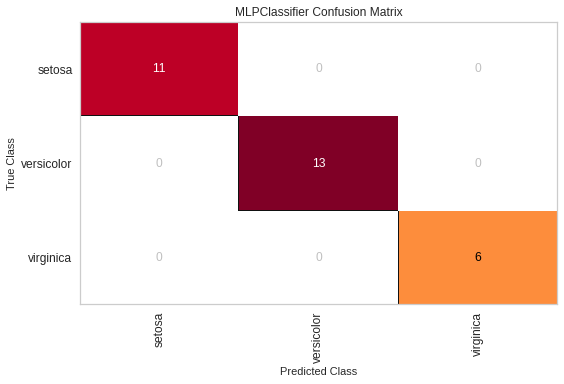

In [11]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(network, classes = iris.target_names)
confusion_matrix.fit(X_train, y_train)
confusion_matrix.score(X_test, y_test)
confusion_matrix.show()

## Neural network (classification)

In [12]:
X_test_transposed = X_test[0].reshape(1, -1)
print(iris.target_names[network.predict(X_test_transposed)])

['virginica']
